In [4]:
import pandas as pd
import os
os.chdir('/Users/abz/Desktop/UNB/Thesis/Code/Thesis-Code/FNDdataset')

df = pd.read_csv('data/fnd_politifact_claims.csv')
print("Columns: ", df.columns)
print("Total claims: ", len(df))

Columns:  Index(['claim', 'claim_factcheck_url', 'claim_author', 'claim_source',
       'claim_date', 'fact_check_date', 'justification',
       'fact_checking_sources', 'issue', 'label'],
      dtype='object')
Total claims:  3377


In [9]:
# Find the date range of claims
df['claim_date'] = pd.to_datetime(df['claim_date'])
print("Earliest claim date:", df['claim_date'].min())
print("Latest claim date:", df['claim_date'].max())

Earliest claim date: 2021-01-03 00:00:00
Latest claim date: 2024-11-10 00:00:00


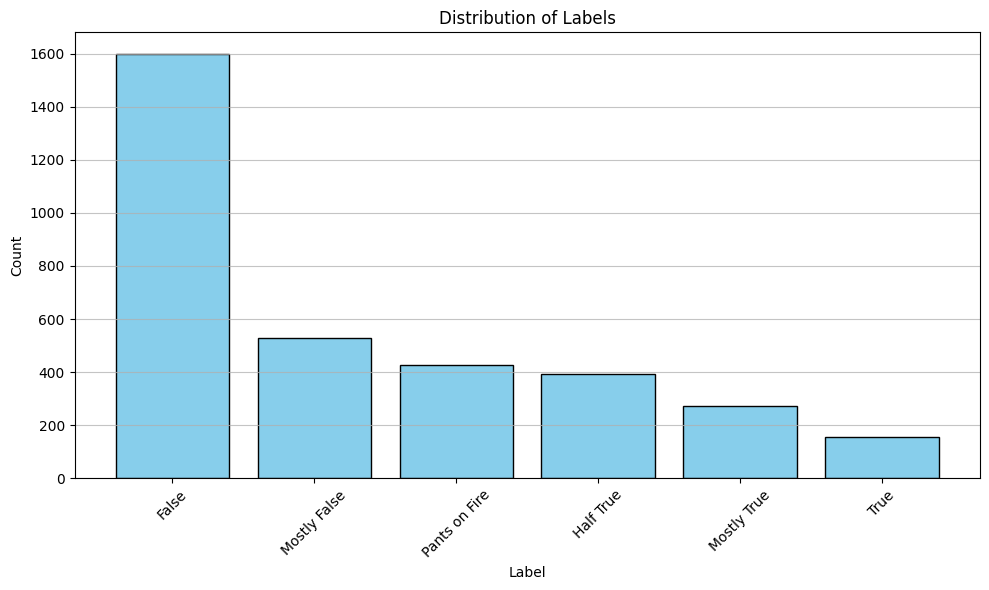

In [5]:
# Let's plot label counts as a graph
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
label_counts = df['label'].value_counts()
plt.bar(label_counts.index, label_counts.values, color='skyblue', edgecolor='black')
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

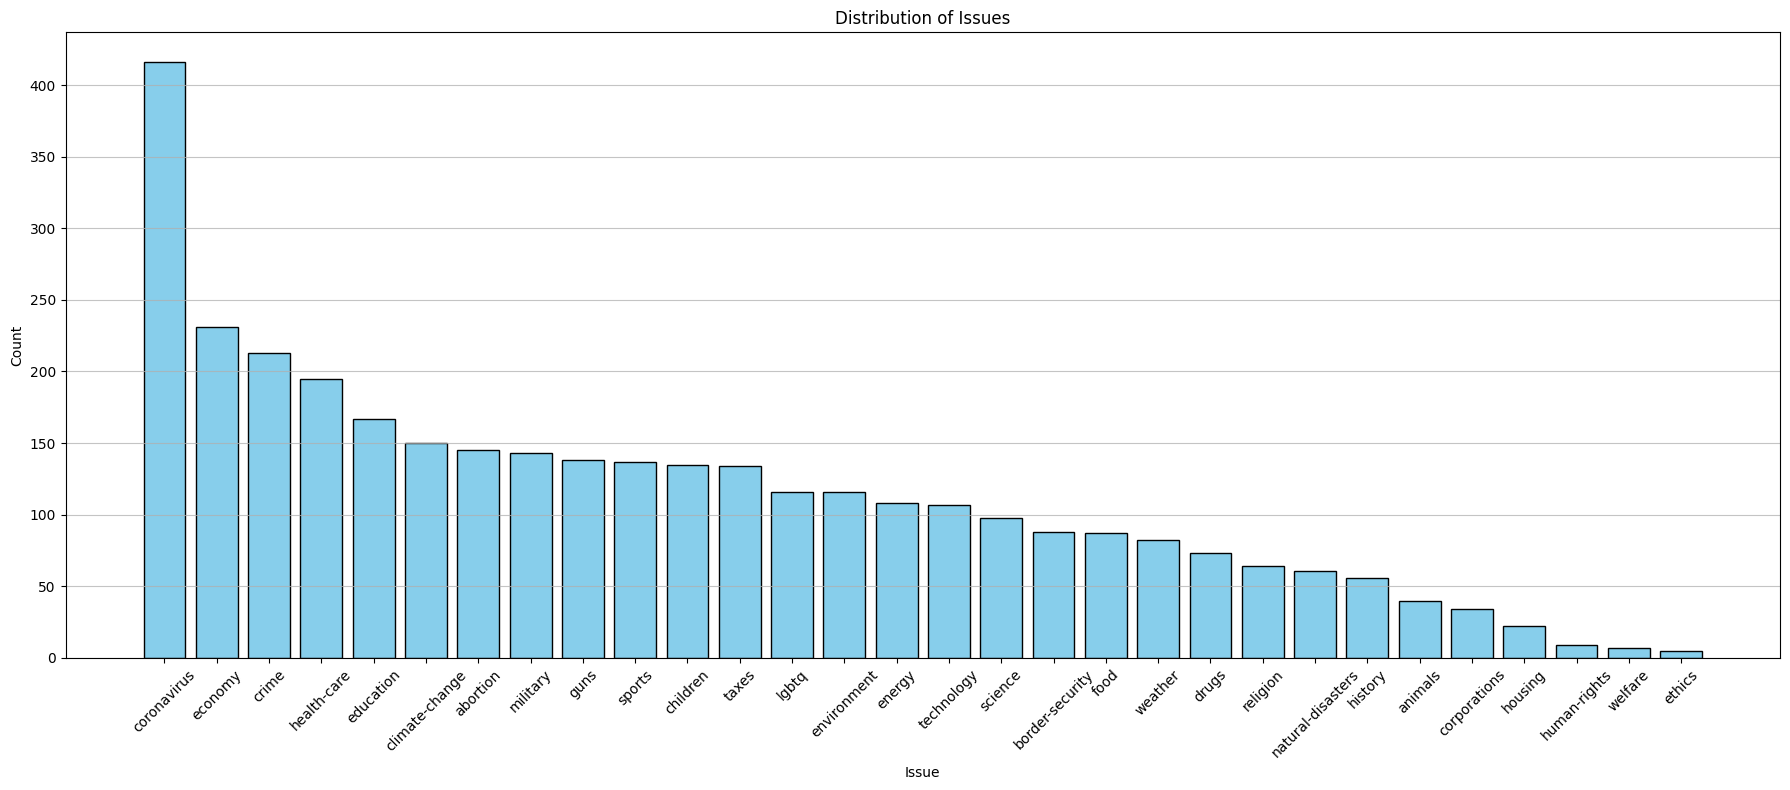

Total number of issues:  30


In [6]:
# Let's plot label counts as a graph
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 8))
label_counts = df['issue'].value_counts()
plt.bar(label_counts.index, label_counts.values, color='skyblue', edgecolor='black')
plt.title('Distribution of Issues')
plt.xlabel('Issue')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

# Print total number of issues
print("Total number of issues: ", len(df['issue'].unique()))

In [7]:
df['issue'].unique()

array(['abortion', 'animals', 'border-security', 'climate-change',
       'coronavirus', 'crime', 'corporations', 'children', 'drugs',
       'economy', 'education', 'energy', 'environment', 'ethics', 'food',
       'guns', 'health-care', 'housing', 'human-rights', 'history',
       'military', 'natural-disasters', 'welfare', 'weather', 'taxes',
       'technology', 'sports', 'science', 'religion', 'lgbtq'],
      dtype=object)

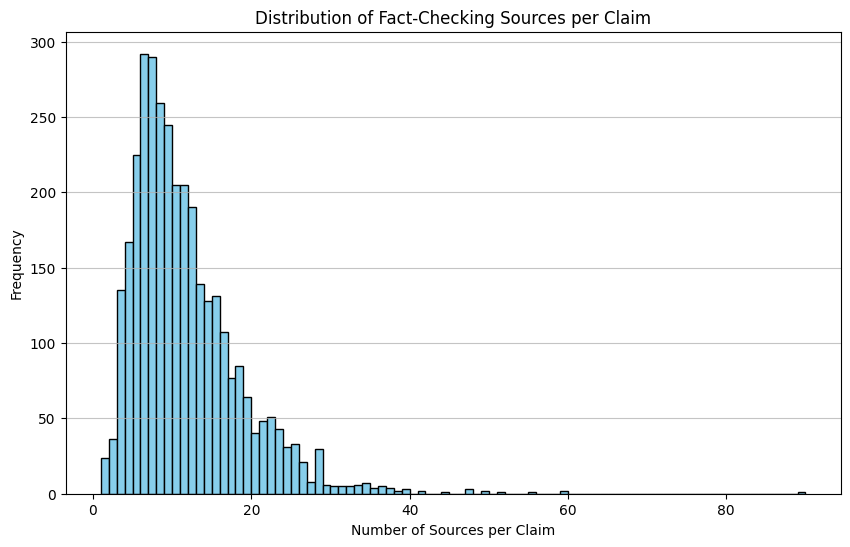

In [39]:
# Print a distribution of the counts as a graph
import matplotlib.pyplot as plt
import ast

counts = []
for idx, row in df.iterrows():
    counts.append(len(ast.literal_eval(row['fact_checking_sources'])))

plt.figure(figsize=(10, 6))  # Set the figure size
plt.hist(counts, bins=range(1, max(counts) + 1), color='skyblue', edgecolor='black')
plt.title('Distribution of Fact-Checking Sources per Claim')
plt.xlabel('Number of Sources per Claim')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)  # Add grid lines for better readability
plt.show()

In [29]:
# Dump all unique claim sources to a file
with open('data/claim_sources.txt', 'w') as f:
    for source in df['claim_source'].unique():
        f.write(f"{source}\n")

In [42]:
# Pick a random claim and print it
df.iloc[200].to_json('data/claim_test.json', indent=4)